In [5]:
from pathlib import Path
import pandas as pd
from bookgraph.reader import YaneuraBookReader
from bookgraph.util import get_project_root
from cshogi import Board

In [6]:
reader = YaneuraBookReader()

In [7]:
path = get_project_root() / Path("data/book.db")
nodes = list(reader.from_file(path))

In [8]:
df = pd.DataFrame(nodes, columns=["node"])

In [9]:
df["board"] = df["node"].map(lambda x: x.sfen_for_hash)
df["next_move"] = df["node"].map(lambda x: x.candidate_moves[0].chosen_move_code)

In [10]:
df.iloc[0].node.board.move_number

19

In [11]:
moves = []
for moves_list in (node.candidate_moves for node in nodes):
    moves += moves_list
moves = moves[:100]

In [12]:
print(moves[0])

sfen_for_hash: +Bn1g1g1nl/2s2k1s1/pp1ppp1p1/6p1p/9/9/PP1PPPPPP/9/+bNSGKGSNL b RLPrlp
next_sfen_for_hash: +Bn1g1g1nl/R1s2k1s1/pp1ppp1p1/6p1p/9/9/PP1PPPPPP/9/+bNSGKGSNL w LPrlp
chosen_move_code: R*9b
expected_next_move_code: 4b3a
evaluation_value: 0
metadata: {'0': '32'}



In [13]:
board_set = set(move.sfen_for_hash for move in moves) | set(move.next_sfen_for_hash for move in moves)
sfen_to_id_dict = {sfen_for_hash: idx for idx, sfen_for_hash in enumerate(board_set)}

In [14]:
sfen_to_id_dict

{'1ns2g1nl/lkg2srb1/pppppp1pp/9/1P7/2PP2p2/P1BSPPSPP/1R2GK3/LN3G1NL b P': 0,
 '1n1g1g1nl/1Bsk3s1/lppp1p1pp/p5p2/7P1/P1P1r4/1PSP1PP1P/5S1R1/LNKG1G1NL w Pbp': 1,
 '1ns2g1nl/lkg3rb1/ppppsp1pp/4p4/1P4p2/2PP5/P1BSPPPPP/1R2G1S2/LN3GKNL w -': 2,
 '1ns2g1nl/lk1g1rsb1/pppp3pp/2P1ppp2/9/4P1PP1/PP1PSP2P/1BR6/LNSGKG1NL b -': 3,
 'kns1g1snl/l1g3rb1/pppppp1pp/9/2P3p2/1R1P5/P1BSPPPPP/9/LN1GKGSNL b P': 4,
 '1n1gkg1nl/r1s3r2/ppp1p1spp/3p1pp2/7P1/2P3P2/PP1PPP1SP/1B4GK1/LNSG3NL b Lb': 5,
 '1ns2g1nl/lkg3rb1/ppppps1pp/5p3/1PSP5/2P3p2/P1B1PPPPP/1R3K3/LN1G1GSNL b -': 6,
 '1ns2g1nl/lk1g1rsb1/ppppp2pp/5pp2/9/4P1PP1/PP1PSP2P/1BR6/LNSGKG1NL b P': 7,
 '1ns2g1nl/lkg2srb1/pppppp1pp/9/1P7/2PP5/P1BSPPSPP/1R2GK3/LN3G1NL w Pp': 8,
 '1ns2gsnl/l1kg1r1b1/ppppp2pp/2P2pp2/9/4P2P1/PP1PSPP1P/1BR6/LNSGKG1NL w -': 9,
 '1ns2g1nl/lkg1rs3/pppp2bpp/4ppp2/7P1/2P1P4/PPBPSPP1P/L6R1/KNSG1G1NL w -': 10,
 '1ns2g1nl/lkg3rb1/ppppsp1pp/4p4/1P4p2/2PP5/P1BSPPPPP/1R2GKS2/LN3G1NL b -': 11,
 'kns2g1nl/l1g2srb1/pppppp1pp/9/6p2/2PP5/P1BSPPPPP/1R4S

In [15]:
df_move = pd.DataFrame(moves, columns=["move"])

In [16]:
df_move["from"] = df_move["move"].map(lambda x: sfen_to_id_dict[x.sfen_for_hash])
df_move["to"] = df_move["move"].map(lambda x: sfen_to_id_dict[x.next_sfen_for_hash])

In [17]:
edge_df = df_move[["from", "to"]].copy()

In [28]:
sum(edge_df["from"] == 0)

0

In [14]:
node_df = pd.DataFrame(sfen_to_id_dict.keys(), columns=["title"], index=sfen_to_id_dict.values())

In [15]:
node_df["id"] = node_df.index

In [16]:
node_df

,title,id
0,1ns2g1nl/lkg2srb1/p1pppp1pp/1R4p2/9/2PP5/P1BSP...,0
1,1ns1g1snl/lkg3rb1/pppppp1pp/6p2/1P1P5/2P6/P1BS...,1
2,1ns2g1nl/lkg2srb1/pppppp1pp/6p2/9/1RPP5/P1BSPP...,2
3,+Bn1g1g1nl/2sk2rs1/pppppp1pp/9/4b1p2/2P6/PP2PP...,3
4,+Bn1g1g1nl/2sk2rs1/pppppp1pp/9/4b4/2P3p2/PP2PP...,4
...,...,...
121,1ns2g1nl/lkg2s1b1/pppppp1pp/6r2/1P4p2/2PP5/P1B...,121
122,1ns2g1nl/lkg3rb1/ppppsp1pp/4p4/1P4p2/2PP5/P1BS...,122
123,1ns1g1snl/lkg3rb1/pppppp1pp/9/6p2/1RPP5/P1BSPP...,123
124,1n1gkg1nl/r1s3r2/ppppp1spp/5pp2/7P1/2P3P2/PP1P...,124


In [17]:
node_df["board"] = node_df["title"].map(lambda x: Board(sfen=x))

In [18]:
node_df.iloc[0]["board"].to_svg().__str__()

'<svg xmlns="http://www.w3.org/2000/svg" version="1.1" xmlns:xlink="http://www.w3.org/1999/xlink" width="230.0" height="192.0" viewBox="0 0 230 192"><defs><g id="black-pawn"><text font-family="serif" font-size="17" text-anchor="middle" x="10.5" y="16.5">&#27497;</text></g><g id="black-lance"><text font-family="serif" font-size="17" text-anchor="middle" x="10.5" y="16.5">&#39321;</text></g><g id="black-knight"><text font-family="serif" font-size="17" text-anchor="middle" x="10.5" y="16.5">&#26690;</text></g><g id="black-silver"><text font-family="serif" font-size="17" text-anchor="middle" x="10.5" y="16.5">&#37504;</text></g><g id="black-gold"><text font-family="serif" font-size="17" text-anchor="middle" x="10.5" y="16.5">&#37329;</text></g><g id="black-bishop"><text font-family="serif" font-size="17" text-anchor="middle" x="10.5" y="16.5">&#35282;</text></g><g id="black-rook"><text font-family="serif" font-size="17" text-anchor="middle" x="10.5" y="16.5">&#39131;</text></g><g id="black

In [21]:
svg = node_df.iloc[0]["board"].to_svg()

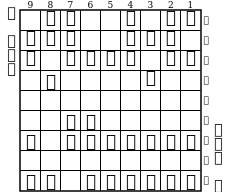

In [28]:
svg

In [27]:
print(str(svg))

<svg xmlns="http://www.w3.org/2000/svg" version="1.1" xmlns:xlink="http://www.w3.org/1999/xlink" width="230.0" height="192.0" viewBox="0 0 230 192"><defs><g id="black-pawn"><text font-family="serif" font-size="17" text-anchor="middle" x="10.5" y="16.5">&#27497;</text></g><g id="black-lance"><text font-family="serif" font-size="17" text-anchor="middle" x="10.5" y="16.5">&#39321;</text></g><g id="black-knight"><text font-family="serif" font-size="17" text-anchor="middle" x="10.5" y="16.5">&#26690;</text></g><g id="black-silver"><text font-family="serif" font-size="17" text-anchor="middle" x="10.5" y="16.5">&#37504;</text></g><g id="black-gold"><text font-family="serif" font-size="17" text-anchor="middle" x="10.5" y="16.5">&#37329;</text></g><g id="black-bishop"><text font-family="serif" font-size="17" text-anchor="middle" x="10.5" y="16.5">&#35282;</text></g><g id="black-rook"><text font-family="serif" font-size="17" text-anchor="middle" x="10.5" y="16.5">&#39131;</text></g><g id="black-

In [20]:
node_df

,title,id,board
0,1ns2g1nl/lkg2srb1/p1pppp1pp/1R4p2/9/2PP5/P1BSP...,0,' 9 8 7 6 5 4 3 2 1\nP1 * -KE-GI * *...
1,1ns1g1snl/lkg3rb1/pppppp1pp/6p2/1P1P5/2P6/P1BS...,1,' 9 8 7 6 5 4 3 2 1\nP1 * -KE-GI * -K...
2,1ns2g1nl/lkg2srb1/pppppp1pp/6p2/9/1RPP5/P1BSPP...,2,' 9 8 7 6 5 4 3 2 1\nP1 * -KE-GI * *...
3,+Bn1g1g1nl/2sk2rs1/pppppp1pp/9/4b1p2/2P6/PP2PP...,3,' 9 8 7 6 5 4 3 2 1\nP1+UM-KE * -KI *...
4,+Bn1g1g1nl/2sk2rs1/pppppp1pp/9/4b4/2P3p2/PP2PP...,4,' 9 8 7 6 5 4 3 2 1\nP1+UM-KE * -KI *...
...,...,...,...
121,1ns2g1nl/lkg2s1b1/pppppp1pp/6r2/1P4p2/2PP5/P1B...,121,' 9 8 7 6 5 4 3 2 1\nP1 * -KE-GI * *...
122,1ns2g1nl/lkg3rb1/ppppsp1pp/4p4/1P4p2/2PP5/P1BS...,122,' 9 8 7 6 5 4 3 2 1\nP1 * -KE-GI * *...
123,1ns1g1snl/lkg3rb1/pppppp1pp/9/6p2/1RPP5/P1BSPP...,123,' 9 8 7 6 5 4 3 2 1\nP1 * -KE-GI * -K...
124,1n1gkg1nl/r1s3r2/ppppp1spp/5pp2/7P1/2P3P2/PP1P...,124,' 9 8 7 6 5 4 3 2 1\nP1 * -KE * -KI-O...


In [40]:
PROJECT_ROOT = Path()
BOARD_DIR = PROJECT_ROOT / "data" / "board"
for node in node_df.itertuples(index=True):
    with open(BOARD_DIR / f"board_{node[0]}.svg", mode="w") as f:
        f.write(str(node.board.to_svg()))

In [55]:
nodes = '\n'.join([f'\tboard_{idx}(<img src=\'/board/board_{idx}.svg\' width=\'69\' height=\'59.4\' /><br>局面{idx})' for idx in range(len(node_df))])
edges = '\n'.join([f"\tboard_{edge[1]} --> board_{edge[2]}" for edge in edge_df.itertuples()])
graph_mermaid = f"""
\tgraph LR
{nodes}
{edges}"""

In [56]:
print(graph_mermaid)


	graph LR
	board_0(<img src='/board/board_0.svg' width='69' height='59.4' /><br>局面0)
	board_1(<img src='/board/board_1.svg' width='69' height='59.4' /><br>局面1)
	board_2(<img src='/board/board_2.svg' width='69' height='59.4' /><br>局面2)
	board_3(<img src='/board/board_3.svg' width='69' height='59.4' /><br>局面3)
	board_4(<img src='/board/board_4.svg' width='69' height='59.4' /><br>局面4)
	board_5(<img src='/board/board_5.svg' width='69' height='59.4' /><br>局面5)
	board_6(<img src='/board/board_6.svg' width='69' height='59.4' /><br>局面6)
	board_7(<img src='/board/board_7.svg' width='69' height='59.4' /><br>局面7)
	board_8(<img src='/board/board_8.svg' width='69' height='59.4' /><br>局面8)
	board_9(<img src='/board/board_9.svg' width='69' height='59.4' /><br>局面9)
	board_10(<img src='/board/board_10.svg' width='69' height='59.4' /><br>局面10)
	board_11(<img src='/board/board_11.svg' width='69' height='59.4' /><br>局面11)
	board_12(<img src='/board/board_12.svg' width='69' height='59.4' /><br>局面12)
	boar

In [1]:
from bookgraph.mermaid import draw_graph
from bookgraph.loader import MermaidGraphGenerator


In [2]:

generator = MermaidGraphGenerator(hash_with_move_number=True)

In [32]:

book_graph = generator.generate_mermaid_graph(board_from=29)

[] {370, 291, 29, 103}
[] {370, 291, 29, 103}
[29] {370, 291, 29, 103}
[103, 291, 370] {370, 291, 103, 29}
[19, 194, 308] {370, 291, 308, 19, 194, 103, 29}
[413] {370, 291, 308, 19, 194, 103, 29, 413}
[4] {194, 291, 4, 103, 370, 19, 308, 29, 413}
[112] {194, 291, 4, 103, 112, 370, 19, 308, 29, 413}
[90] {194, 291, 4, 103, 112, 370, 19, 308, 90, 29, 413}
[110, 162] {194, 291, 4, 162, 103, 110, 112, 370, 19, 308, 90, 29, 413}
[192, 250] {192, 194, 291, 4, 162, 103, 250, 110, 112, 370, 19, 308, 90, 29, 413}
